In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("breast-cancer.csv")

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
df['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [5]:
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [7]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [8]:
df = df.drop(["id","Unnamed: 32"],axis = 1)

In [9]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [10]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [11]:
df['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [12]:
df['diagnosis'] = df['diagnosis'].map({'M':1 , 'B':0}).astype(int)

In [13]:
df['diagnosis'].unique()

array([1, 0])

In [14]:
a = df.columns
a

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [16]:
import warnings
warnings.filterwarnings("ignore")

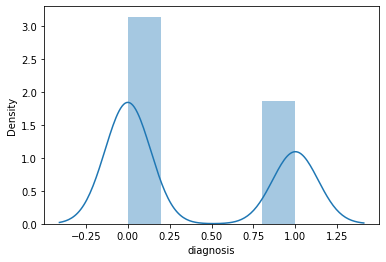

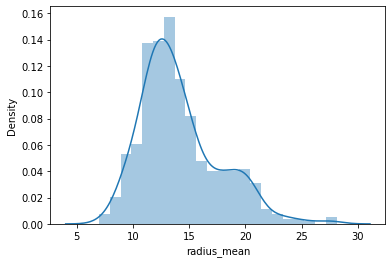

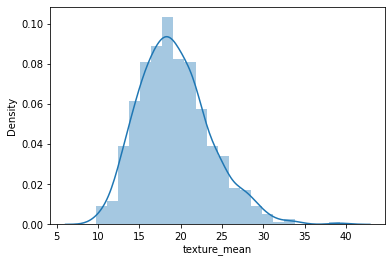

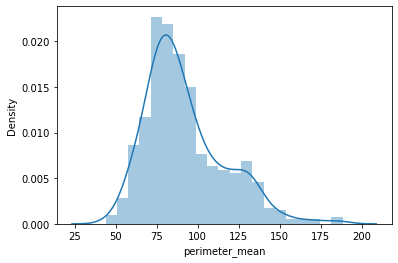

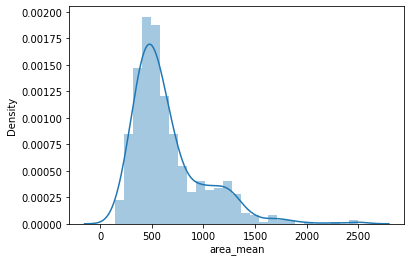

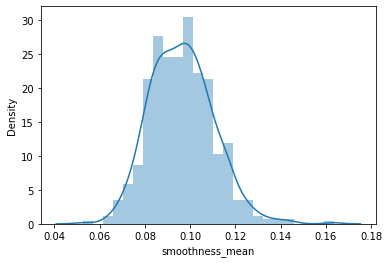

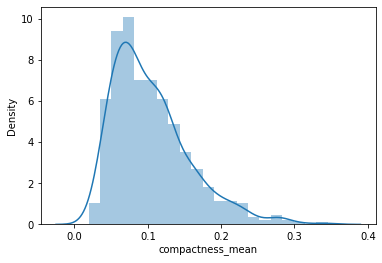

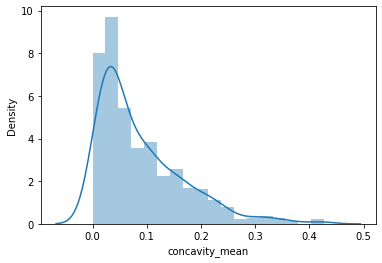

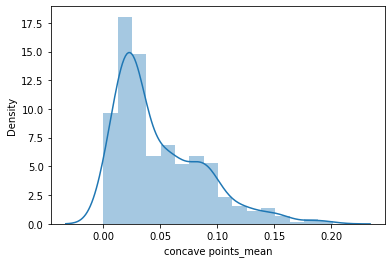

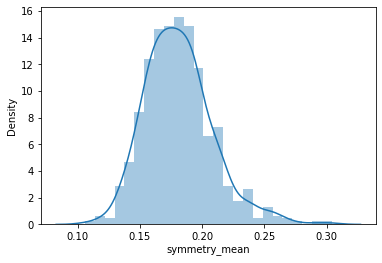

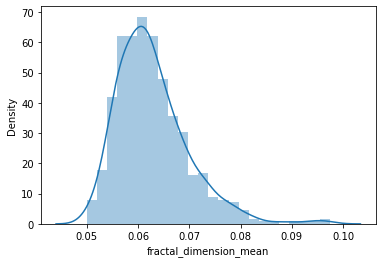

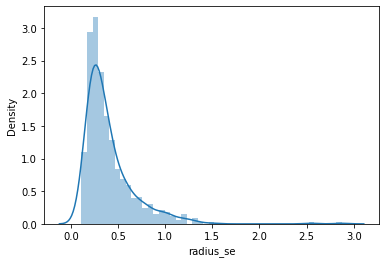

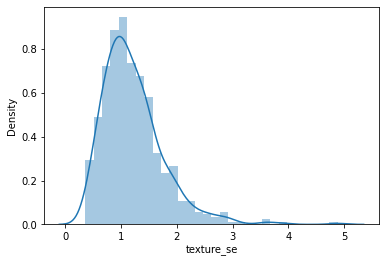

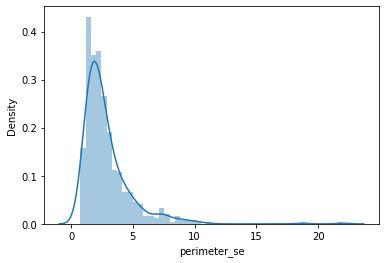

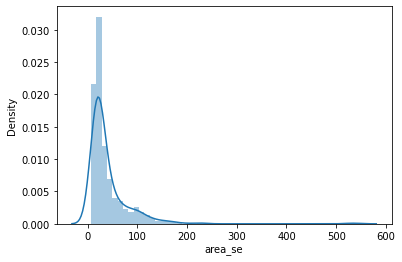

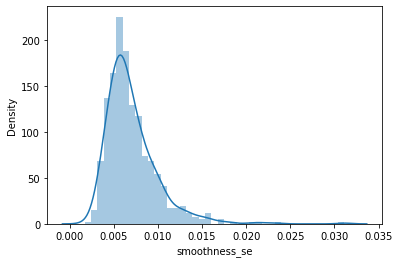

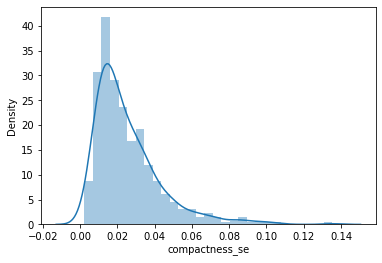

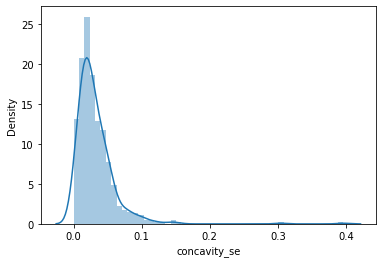

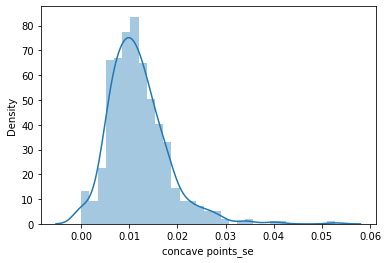

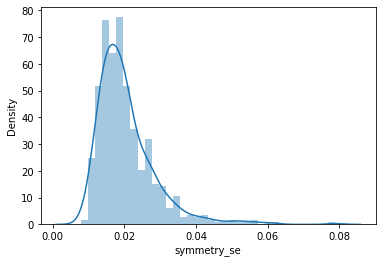

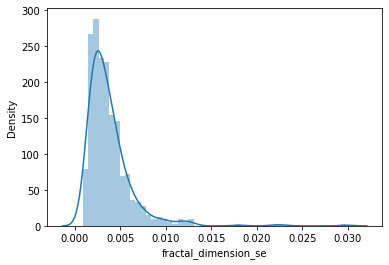

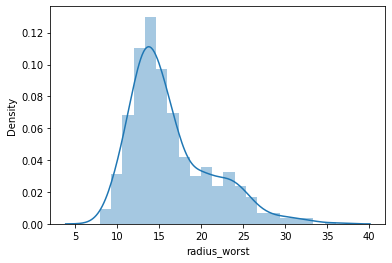

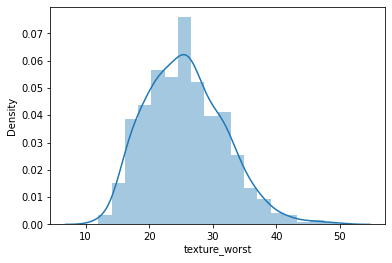

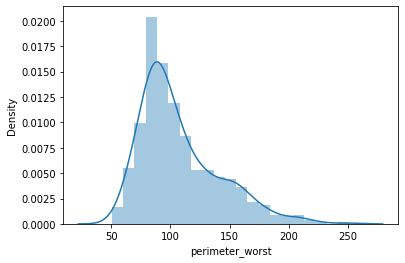

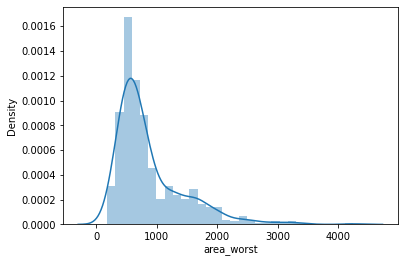

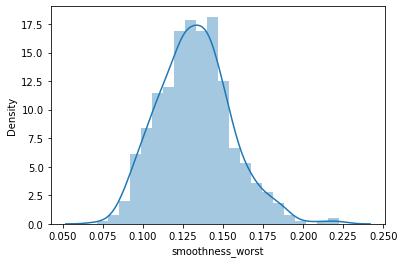

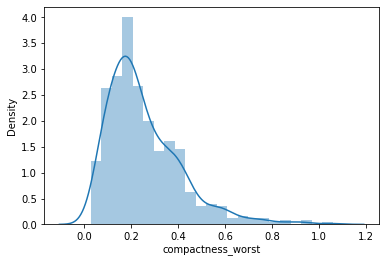

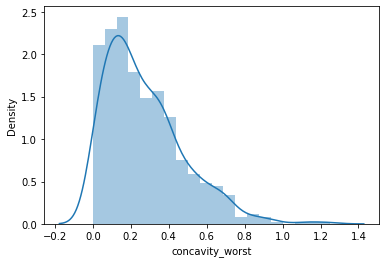

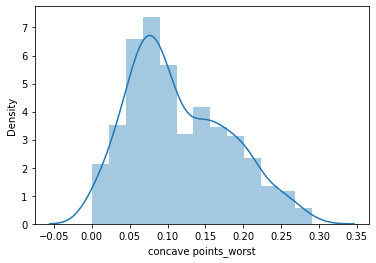

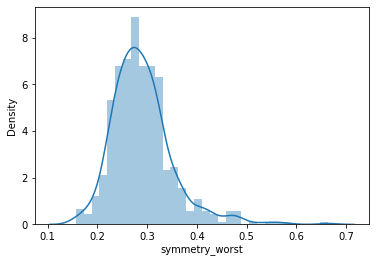

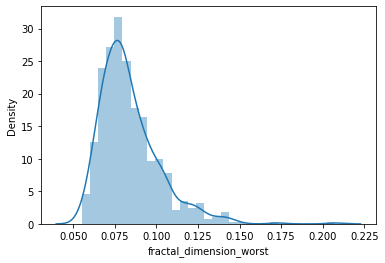

In [17]:
for i in a:
    sns.distplot(a = df[i])
    plt.show()
    

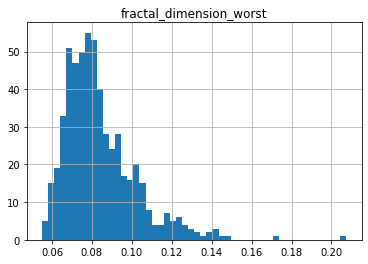

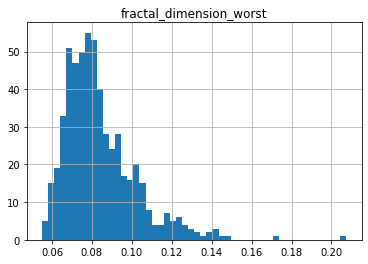

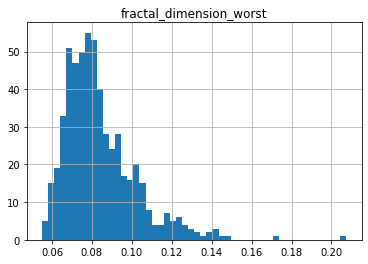

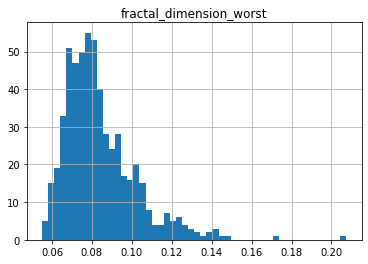

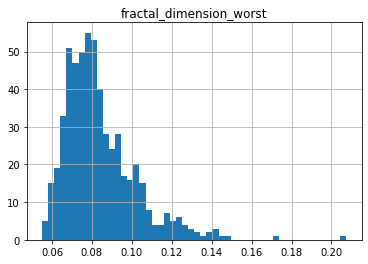

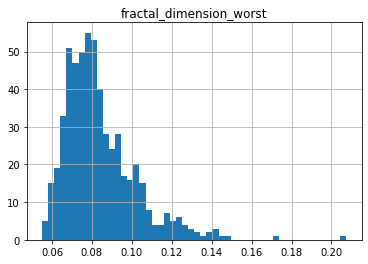

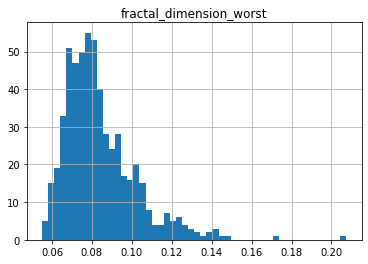

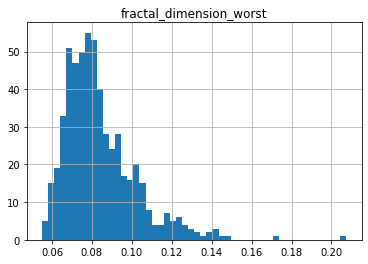

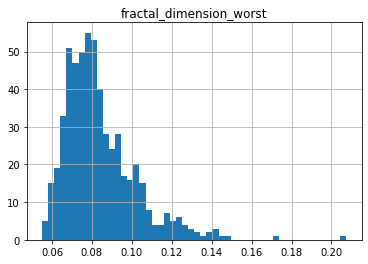

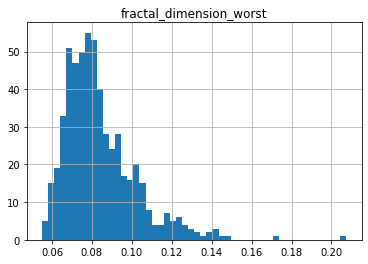

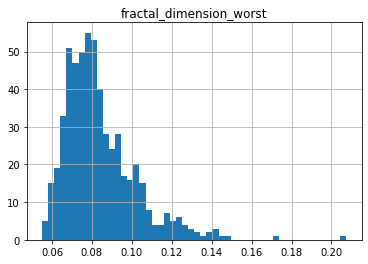

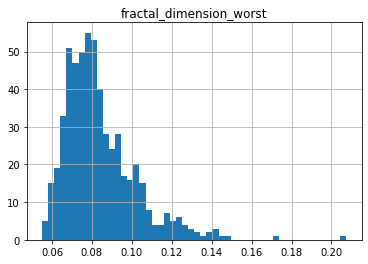

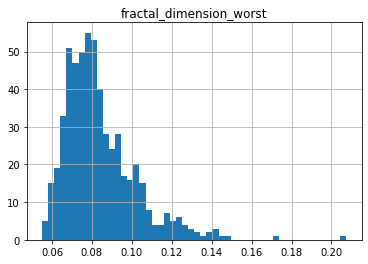

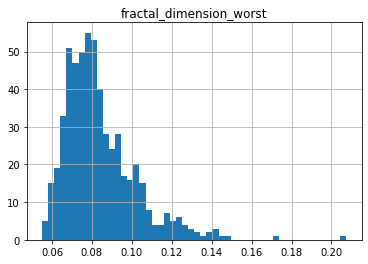

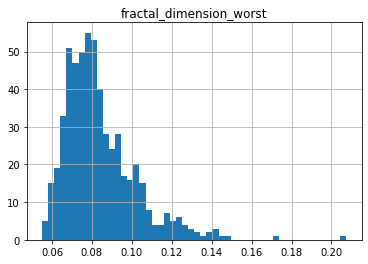

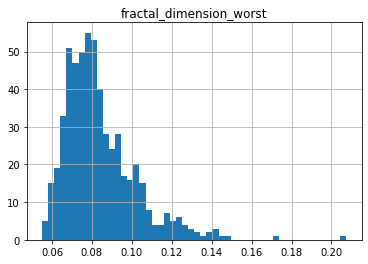

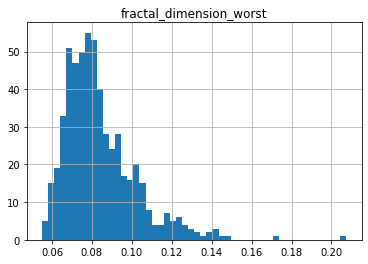

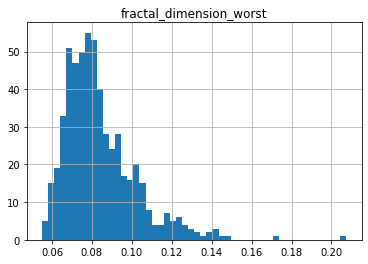

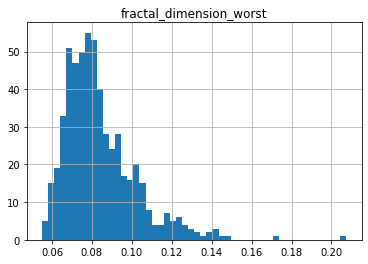

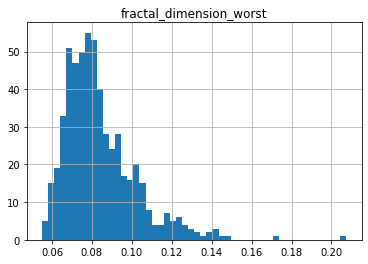

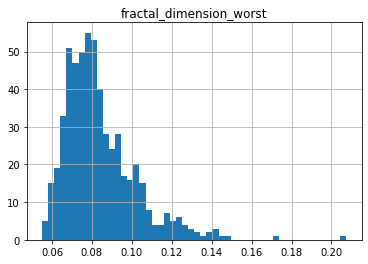

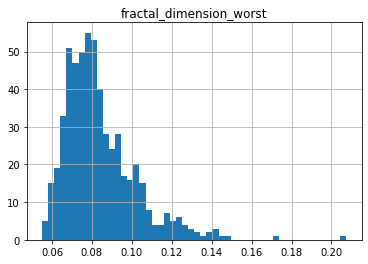

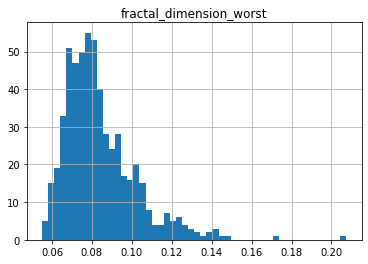

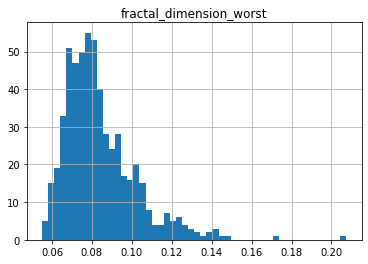

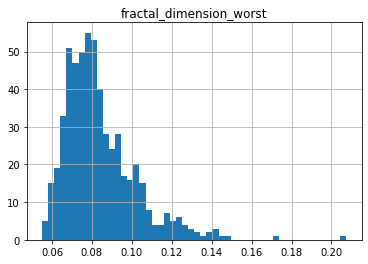

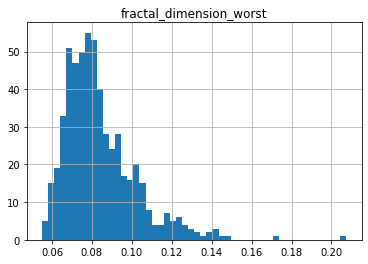

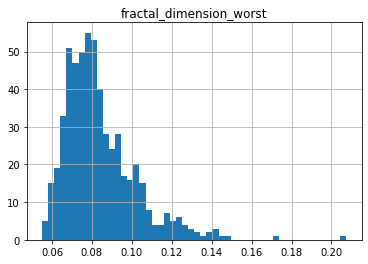

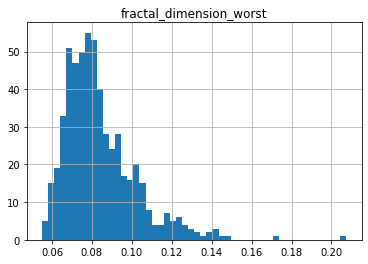

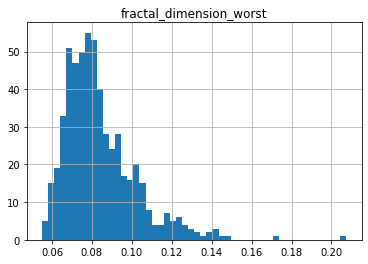

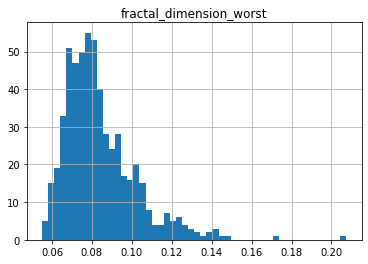

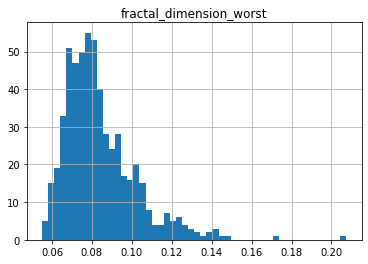

In [18]:
for j in a:
    df.hist(i,bins = 50)
    plt.show()
    

In [19]:
df.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


<AxesSubplot:>

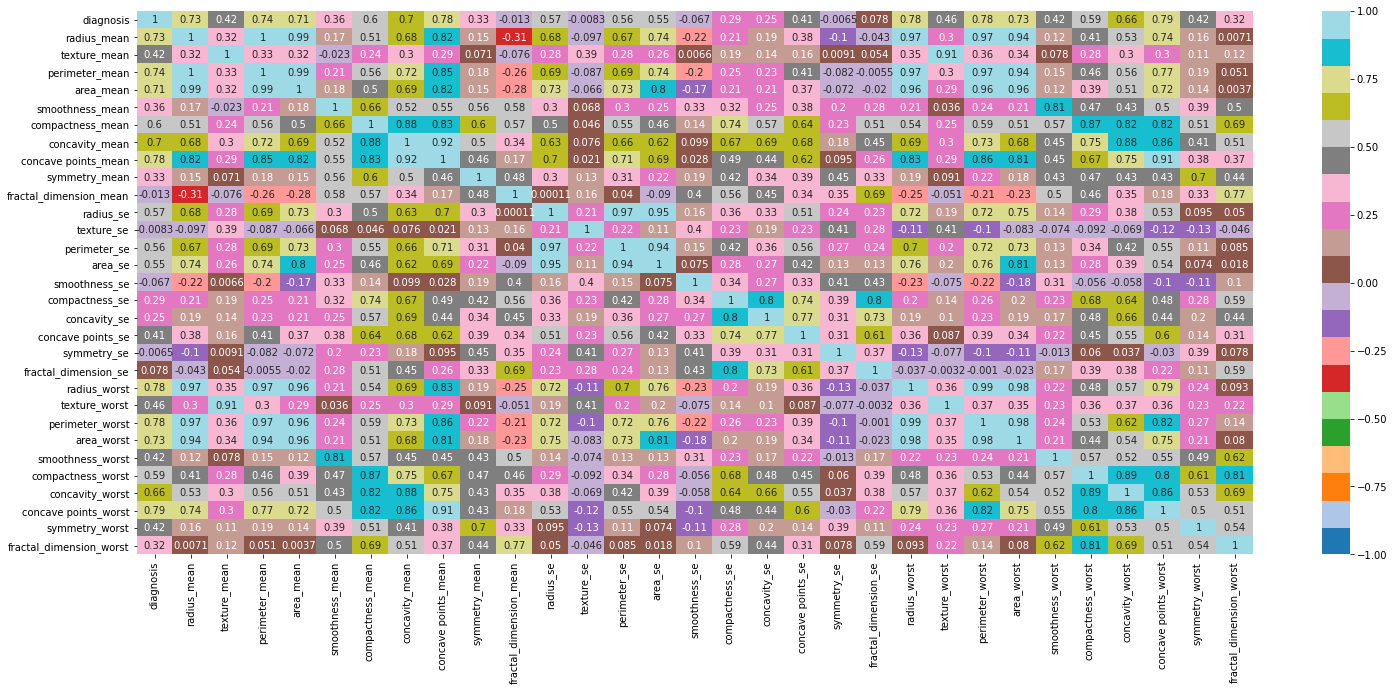

In [22]:
plt.figure(figsize = (25,10))
sns.heatmap(df.corr(),vmin=-1,vmax = 1 , cmap = 'tab20',annot = True)

In [23]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [24]:
X = df.iloc[: , 1:]
y = df.iloc[: , 0]

In [25]:
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [27]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: diagnosis, dtype: int32

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_train,X_test,y_train,y_test = train_test_split(X , y , test_size = 0.33 , random_state = 11)

In [31]:
X_train

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
191,12.77,21.41,82.02,507.4,0.08749,0.06601,0.031120,0.028640,0.1694,0.06287,...,13.75,23.50,89.04,579.5,0.09388,0.08978,0.05186,0.04773,0.2179,0.06871
180,27.22,21.87,182.10,2250.0,0.10940,0.19140,0.287100,0.187800,0.1800,0.05770,...,33.12,32.85,220.80,3216.0,0.14720,0.40340,0.53400,0.26880,0.2856,0.08082
121,18.66,17.12,121.40,1077.0,0.10540,0.11000,0.145700,0.086650,0.1966,0.06213,...,22.25,24.90,145.40,1549.0,0.15030,0.22910,0.32720,0.16740,0.2894,0.08456
340,14.42,16.54,94.15,641.2,0.09751,0.11390,0.080070,0.042230,0.1912,0.06412,...,16.67,21.51,111.40,862.1,0.12940,0.33710,0.37550,0.14140,0.3053,0.08764
355,12.56,19.07,81.92,485.8,0.08760,0.10380,0.103000,0.043910,0.1533,0.06184,...,13.37,22.43,89.02,547.4,0.10960,0.20020,0.23880,0.09265,0.2121,0.07188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
332,11.22,19.86,71.94,387.3,0.10540,0.06779,0.005006,0.007583,0.1940,0.06028,...,11.98,25.78,76.91,436.1,0.14240,0.09669,0.01335,0.02022,0.3292,0.06522
269,10.71,20.39,69.50,344.9,0.10820,0.12890,0.084480,0.028670,0.1668,0.06862,...,11.69,25.21,76.51,410.4,0.13350,0.25500,0.25340,0.08600,0.2605,0.08701
337,18.77,21.43,122.90,1092.0,0.09116,0.14020,0.106000,0.060900,0.1953,0.06083,...,24.54,34.37,161.10,1873.0,0.14980,0.48270,0.46340,0.20480,0.3679,0.09870
91,15.37,22.76,100.20,728.2,0.09200,0.10360,0.112200,0.074830,0.1717,0.06097,...,16.43,25.84,107.50,830.9,0.12570,0.19970,0.28460,0.14760,0.2556,0.06828


In [32]:
X_test

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
198,19.18,22.49,127.50,1148.0,0.08523,0.14280,0.111400,0.067720,0.1767,0.05529,...,23.36,32.06,166.40,1688.0,0.1322,0.56010,0.38650,0.17080,0.3193,0.09221
162,19.59,18.15,130.70,1214.0,0.11200,0.16660,0.250800,0.128600,0.2027,0.06082,...,26.73,26.39,174.90,2232.0,0.1438,0.38460,0.68100,0.22470,0.3643,0.09223
70,18.94,21.31,123.60,1130.0,0.09009,0.10290,0.108000,0.079510,0.1582,0.05461,...,24.86,26.58,165.90,1866.0,0.1193,0.23360,0.26870,0.17890,0.2551,0.06589
393,21.61,22.28,144.40,1407.0,0.11670,0.20870,0.281000,0.156200,0.2162,0.06606,...,26.23,28.74,172.00,2081.0,0.1502,0.57170,0.70530,0.24220,0.3828,0.10070
56,19.21,18.57,125.50,1152.0,0.10530,0.12670,0.132300,0.089940,0.1917,0.05961,...,26.14,28.14,170.10,2145.0,0.1624,0.35110,0.38790,0.20910,0.3537,0.08294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207,17.01,20.26,109.70,904.3,0.08772,0.07304,0.069500,0.053900,0.2026,0.05223,...,19.80,25.05,130.00,1210.0,0.1111,0.14860,0.19320,0.10960,0.3275,0.06469
25,17.14,16.40,116.00,912.7,0.11860,0.22760,0.222900,0.140100,0.3040,0.07413,...,22.25,21.40,152.40,1461.0,0.1545,0.39490,0.38530,0.25500,0.4066,0.10590
309,13.05,13.84,82.71,530.6,0.08352,0.03735,0.004559,0.008829,0.1453,0.05518,...,14.73,17.40,93.96,672.4,0.1016,0.05847,0.01824,0.03532,0.2107,0.06580
106,11.64,18.33,75.17,412.5,0.11420,0.10170,0.070700,0.034850,0.1801,0.06520,...,13.14,29.26,85.51,521.7,0.1688,0.26600,0.28730,0.12180,0.2806,0.09097


In [34]:
y_train.head()

191    0
180    1
121    1
340    0
355    0
Name: diagnosis, dtype: int32

In [35]:
y_test.head()

198    1
162    1
70     1
393    1
56     1
Name: diagnosis, dtype: int32

In [36]:
len(X_train) , len(y_train)

(381, 381)

In [38]:
len(X_test) , len(y_test)

(188, 188)

## KNN_Implementation

In [40]:
k = np.arange(1,25)
k

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])

In [41]:
len(k)

24

In [42]:
t = np.empty(24)
t

array([0.02729   , 0.07210348, 0.11691696, 0.16173043, 0.20654391,
       0.25135739, 0.29617087, 0.34098435, 0.38579783, 0.4306113 ,
       0.47542478, 0.52023826, 0.56505174, 0.60986522, 0.6546787 ,
       0.69949217, 0.74430565, 0.78911913, 0.83393261, 0.87874609,
       0.92355957, 0.96837304, 1.01318652, 1.058     ])

In [ ]:
g = np.empty(len(k))
g

In [49]:
l1 = ["eat","sleep","repeat"]
 
# printing the tuples in object directly
for ele in enumerate(l1):
    print (ele)
print
# changing index and printing separately
for count,ele in enumerate(l1,100):
    print (count,ele)

(0, 'eat')
(1, 'sleep')
(2, 'repeat')
100 eat
101 sleep
102 repeat


In [53]:
from sklearn.neighbors import KNeighborsClassifier

In [55]:
training_accuracy = np.empty(len(k))
test_accuracy = np.empty(len(k))
for i,j in enumerate(k):
    knn = KNeighborsClassifier(n_neighbors=j)
    knn.fit(X_train,y_train)
    training_accuracy[i] = knn.score(X_train,y_train)
    test_accuracy[i] = knn.score(X_test,y_test)
    print(training_accuracy , test_accuracy)

[1.         0.07210348 0.11691696 0.16173043 0.20654391 0.25135739
 0.29617087 0.34098435 0.38579783 0.4306113  0.47542478 0.52023826
 0.56505174 0.60986522 0.6546787  0.69949217 0.74430565 0.78911913
 0.83393261 0.87874609 0.92355957 0.96837304 1.01318652 1.058     ] [0.89893617 0.07210348 0.11691696 0.16173043 0.20654391 0.25135739
 0.29617087 0.34098435 0.38579783 0.4306113  0.47542478 0.52023826
 0.56505174 0.60986522 0.6546787  0.69949217 0.74430565 0.78911913
 0.83393261 0.87874609 0.92355957 0.96837304 1.01318652 1.058     ]
[1.         0.95800525 0.11691696 0.16173043 0.20654391 0.25135739
 0.29617087 0.34098435 0.38579783 0.4306113  0.47542478 0.52023826
 0.56505174 0.60986522 0.6546787  0.69949217 0.74430565 0.78911913
 0.83393261 0.87874609 0.92355957 0.96837304 1.01318652 1.058     ] [0.89893617 0.89361702 0.11691696 0.16173043 0.20654391 0.25135739
 0.29617087 0.34098435 0.38579783 0.4306113  0.47542478 0.52023826
 0.56505174 0.60986522 0.6546787  0.69949217 0.74430565 0.7

[1.         0.95800525 0.96062992 0.95538058 0.94750656 0.93963255
 0.94225722 0.9343832  0.93700787 0.9343832  0.93700787 0.93963255
 0.93700787 0.9343832  0.93700787 0.9343832  0.93700787 0.78911913
 0.83393261 0.87874609 0.92355957 0.96837304 1.01318652 1.058     ] [0.89893617 0.89361702 0.90957447 0.92021277 0.93085106 0.93085106
 0.92553191 0.92553191 0.92553191 0.92021277 0.92021277 0.91489362
 0.92021277 0.91489362 0.91489362 0.91489362 0.91489362 0.78911913
 0.83393261 0.87874609 0.92355957 0.96837304 1.01318652 1.058     ]
[1.         0.95800525 0.96062992 0.95538058 0.94750656 0.93963255
 0.94225722 0.9343832  0.93700787 0.9343832  0.93700787 0.93963255
 0.93700787 0.9343832  0.93700787 0.9343832  0.93700787 0.92913386
 0.83393261 0.87874609 0.92355957 0.96837304 1.01318652 1.058     ] [0.89893617 0.89361702 0.90957447 0.92021277 0.93085106 0.93085106
 0.92553191 0.92553191 0.92553191 0.92021277 0.92021277 0.91489362
 0.92021277 0.91489362 0.91489362 0.91489362 0.91489362 0.9

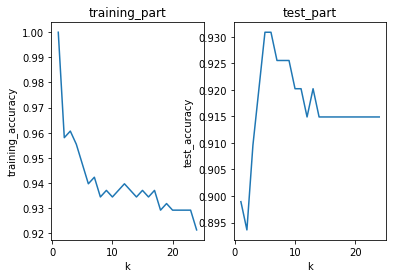

In [60]:
plt.subplot(1,2,1)
plt.title("training_part")
plt.xlabel("k")
plt.ylabel("training_accuracy")
plt.plot(k,training_accuracy)
plt.subplot(1,2,2)
plt.title("test_part")
plt.xlabel("k")
plt.ylabel("test_accuracy")
plt.plot(k,test_accuracy)
plt.show()


In [61]:
p = np.where(test_accuracy == max(test_accuracy))

In [62]:
p

(array([4, 5], dtype=int64),)

In [63]:
k[p]

array([5, 6])

In [ ]:
## if k =3

In [64]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [65]:
y_train_pred = knn.predict(X_train)

In [66]:
y_train[:10]

191    0
180    1
121    1
340    0
355    0
532    0
271    0
278    0
71     0
240    0
Name: diagnosis, dtype: int32

In [67]:
y_train_pred[:10]

array([0, 1, 1, 0, 0, 1, 0, 0, 0, 0])

In [68]:
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

In [69]:
accuracy_score(y_train,y_train_pred)

0.9606299212598425

In [71]:
y_test_pred = knn.predict(X_test)
accuracy_score(y_test,y_test_pred)

0.9095744680851063

In [70]:
knn.score(X_test,y_test)

0.9095744680851063

In [73]:
confusion_matrix(y_train,y_train_pred) # training

array([[231,   5],
       [ 10, 135]], dtype=int64)

In [74]:
confusion_matrix(y_test,y_test_pred)  # test

array([[116,   5],
       [ 12,  55]], dtype=int64)

In [75]:
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       236
           1       0.96      0.93      0.95       145

    accuracy                           0.96       381
   macro avg       0.96      0.95      0.96       381
weighted avg       0.96      0.96      0.96       381



In [76]:
print(classification_report(y_test,y_test_pred))  ## test part 

              precision    recall  f1-score   support

           0       0.91      0.96      0.93       121
           1       0.92      0.82      0.87        67

    accuracy                           0.91       188
   macro avg       0.91      0.89      0.90       188
weighted avg       0.91      0.91      0.91       188



## k = 5

In [77]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [78]:
knn.score(X_train,y_train)

0.94750656167979

In [79]:
knn.score(X_test,y_test)

0.9308510638297872

### Graphical representation

In [82]:
from sklearn.model_selection import cross_val_score

In [84]:
accuracy_rate = []
for i in range(1,25):
    knn = KNeighborsClassifier(n_neighbors=i)
    score = cross_val_score(knn,X,y,cv = 10)
    accuracy_rate.append(score.mean())

In [85]:
accuracy_rate

[0.9156954887218045,
 0.9121240601503761,
 0.9261904761904761,
 0.9227130325814535,
 0.9297619047619046,
 0.9297619047619048,
 0.9279761904761905,
 0.924436090225564,
 0.9262531328320801,
 0.9227130325814535,
 0.9297619047619046,
 0.9279761904761903,
 0.9315162907268169,
 0.9332706766917293,
 0.9297619047619046,
 0.9297305764411027,
 0.9297619047619048,
 0.9279761904761905,
 0.9315162907268169,
 0.9297619047619048,
 0.9297619047619048,
 0.9280075187969924,
 0.9280075187969924,
 0.9280075187969924]

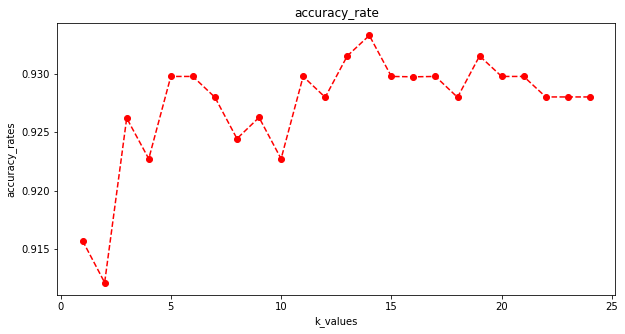

In [89]:
plt.figure(figsize = (10,5))
plt.title("accuracy_rate")
plt.xlabel("k_values")
plt.ylabel("accuracy_rates")
plt.plot(np.arange(1,25),accuracy_rate,color = 'r' , marker = 'o',ls = '--')
plt.show()

In [91]:
error_rate = []
for i in range(1,25):
    knn = KNeighborsClassifier(n_neighbors=i)
    score = cross_val_score(knn,X,y,cv = 10)
    error_rate.append(1 - score.mean())

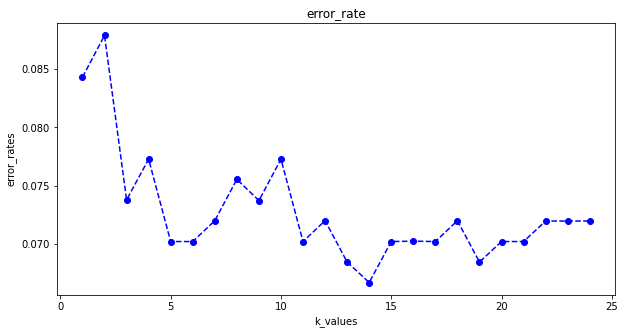

In [92]:
plt.figure(figsize = (10,5))
plt.title("error_rate")
plt.xlabel("k_values")
plt.ylabel("error_rates")
plt.plot(np.arange(1,25),error_rate,color = 'b' , marker = 'o',ls = '--')
plt.show()